### Import Python Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Supress Warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Adjust Jupyer Views:

In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
# Set display options to show all rows
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_json(r"C:\Users\ASUS\Downloads\loan_approval_dataset.json")

In [5]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### Inspect Data Frames

In [7]:
df.shape

(252000, 13)

In [8]:
print('Number of columns:',df.shape[1])
print('Number of rows:',df.shape[0])

Number of columns: 13
Number of rows: 252000


#### Database column datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


#### Checking the numeric variables of the dataframes

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [11]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['number'])
num_cols

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,3,13,0
1,2,7574516,40,10,9,13,0
2,3,3991815,66,4,4,10,0
3,4,6256451,41,2,2,12,1
4,5,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,6,11,0
251996,251997,2843572,26,10,6,11,0
251997,251998,4522448,46,7,7,12,0
251998,251999,6507128,45,0,0,10,0


#### Checking for missing values

In [12]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

##### Inference: There is no missing value in this dataset 

#### Analyze & Delete Unnecessary Columns

In [13]:
# Compute the correlation matrix
correlation_matrix = num_cols.corr()
correlation_matrix 

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


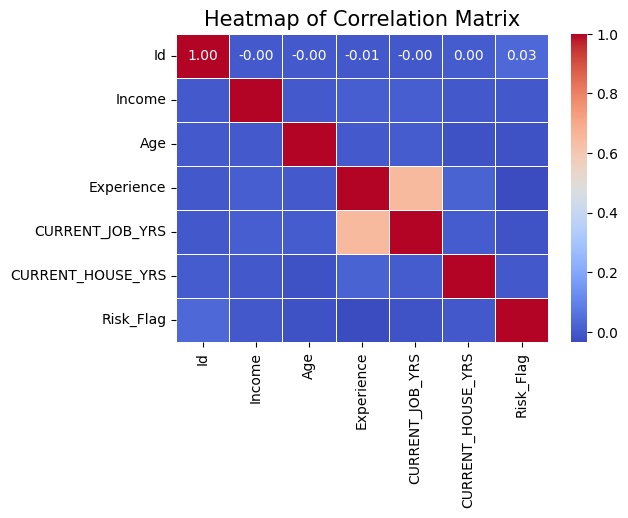

In [14]:
# Set the size of the heatmap
plt.figure(figsize=(6, 4))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Heatmap of Correlation Matrix', size=15)

# Show the plot
plt.show()


## Visulization

#### Check the distribution of the target variable 'Risk_Flag'

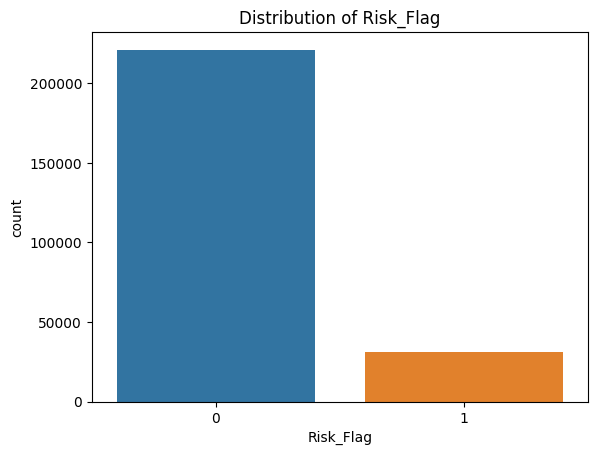

In [15]:
sns.countplot(x='Risk_Flag', data=df)
plt.title('Distribution of Risk_Flag')
plt.show()

#### Distribution of Target Variable 'Risk_Flag'

- **Insights:** 
  - The distribution shows an imbalance with more instances of low-risk (0) compared to high-risk (1).
  - This imbalance might need to be addressed during model training to ensure balanced prediction accuracy.


#### 1. Numerical Variables vs. Target (Risk_Flag)

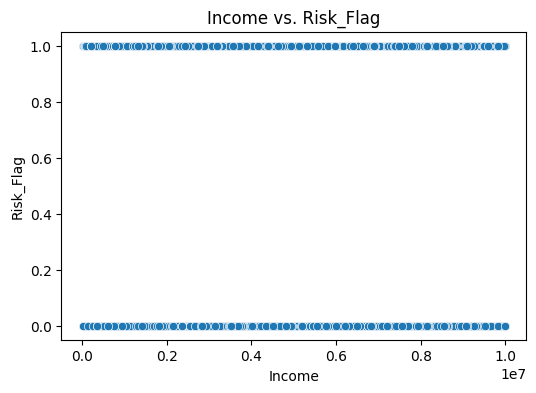

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='Risk_Flag', data=df)
plt.title('Income vs. Risk_Flag')
plt.show()

In [17]:
correlation_coefficient = df['Income'].corr(df['Risk_Flag'])
print(f"Pearson's correlation coefficient between Income and Risk_Flag: {correlation_coefficient:.2f}")


Pearson's correlation coefficient between Income and Risk_Flag: -0.00


In [18]:
correlation_coefficient = df['Experience'].corr(df['Risk_Flag'])
print(f"Pearson's correlation coefficient between Income and Risk_Flag: {correlation_coefficient:.2f}")

Pearson's correlation coefficient between Income and Risk_Flag: -0.03


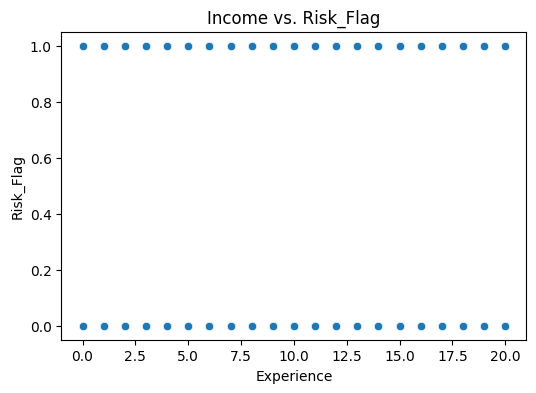

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Experience', y='Risk_Flag', data=df)
plt.title('Income vs. Risk_Flag')
plt.show()

In [20]:
correlation_coefficient = df['Age'].corr(df['Risk_Flag'])
print(f"Pearson's correlation coefficient between Income and Risk_Flag: {correlation_coefficient:.2f}")

Pearson's correlation coefficient between Income and Risk_Flag: -0.02


In [21]:
correlation_coefficient = df['CURRENT_JOB_YRS'].corr(df['Risk_Flag'])
print(f"Pearson's correlation coefficient between Income and Risk_Flag: {correlation_coefficient:.2f}")

Pearson's correlation coefficient between Income and Risk_Flag: -0.02


##### 1. Heatmap of Correlation Matrix

- The heatmap shows correlations between numerical variables and the `Risk_Flag`.
- **Insights:** 
  - `Income` has a very weak negative correlation with `Risk_Flag` (-0.00), suggesting that income alone might not strongly predict loan approval risk.
  - Other variables like `Experience` and `Age` also show weak correlations with `Risk_Flag`.
  - `CURRENT_JOB_YRS` and `CURRENT_HOUSE_YRS` have negligible correlations with `Risk_Flag`.

### 2. Categorical Variables vs. Target (Risk_Flag)

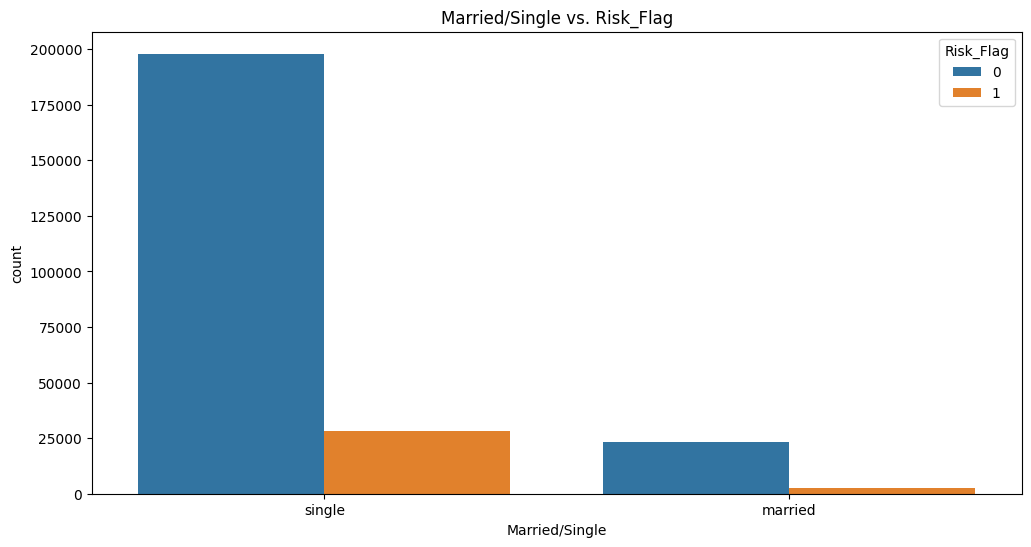

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)
plt.title('Married/Single vs. Risk_Flag')
plt.show()

##### 4. Categorical Variables (e.g., Marital Status) vs. Target 'Risk_Flag'

- **Insights:** 
  - Categorical variables like `Married/Single` show different distributions across `Risk_Flag` categories.
  - This indicates that marital status might influence loan approval risk, with potential differences in approval rates between married and single individuals.

### 3. Distribution Plots

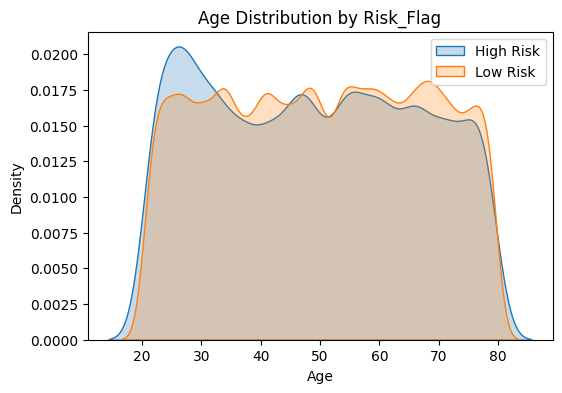

In [23]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['Risk_Flag'] == 1]['Age'], label='High Risk', shade=True)
sns.kdeplot(df[df['Risk_Flag'] == 0]['Age'], label='Low Risk', shade=True)
plt.title('Age Distribution by Risk_Flag')
plt.legend()
plt.show()

##### 5. Distribution Plots (e.g., Age by Risk_Flag)

- **Insights:** 
  - The KDE plot of `Age` shows overlapping distributions between high-risk and low-risk categories.
  - This suggests that age alone might not be a strong predictor of loan approval risk.

### 4.Box Plots for Outliers

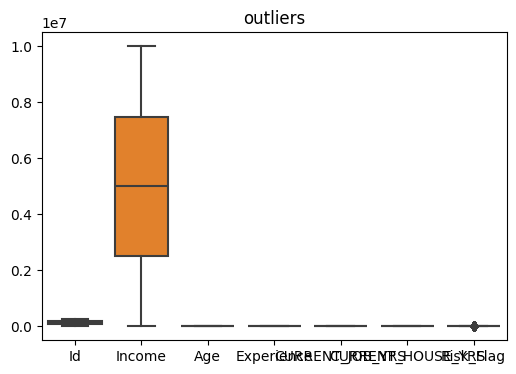

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.title('outliers')
plt.show()

##### 6. Box Plots for Outliers

- **Insights:** 
  - The box plot provides a visual representation of the spread of numerical variables and helps in identifying potential outliers.
  - Outliers can be further investigated to understand their impact on loan approval decisions and whether they correlate with higher risk profiles.

### Feature Selection: 
**Based on correlations and visualizations, variables like `Income` and `Age` show weak correlations with `Risk_Flag`.

**exploring additional features or interactions that might better predict loan approval risk.

In [25]:
# Example: Creating interaction features
df['Income_to_Age_Ratio'] = df['Income'] / df['Age']
df['Job_Experience_Ratio'] = df['Experience'] / df['CURRENT_JOB_YRS']

In [26]:
df['Income_to_Age_Ratio']

0          56688.434783
1         189362.900000
2          60482.045455
3         152596.365854
4         122741.936170
              ...      
251995    189648.441860
251996    109368.153846
251997     98314.086957
251998    144602.844444
251999    129574.714286
Name: Income_to_Age_Ratio, Length: 252000, dtype: float64

In [27]:
df['Job_Experience_Ratio']

0         1.000000
1         1.111111
2         1.000000
3         1.000000
4         3.666667
            ...   
251995    2.166667
251996    1.666667
251997    1.000000
251998         NaN
251999    2.428571
Name: Job_Experience_Ratio, Length: 252000, dtype: float64

In [28]:
correlation_coefficient = df['Income_to_Age_Ratio'].corr(df['Risk_Flag'])
print(f"Pearson's correlation coefficient between Income and Risk_Flag: {correlation_coefficient:.2f}")

Pearson's correlation coefficient between Income and Risk_Flag: 0.01


In [29]:
correlation_coefficient = df['Job_Experience_Ratio'].corr(df['Risk_Flag'])
print(f"Pearson's correlation coefficient between Income and Risk_Flag: {correlation_coefficient:.2f}")

Pearson's correlation coefficient between Income and Risk_Flag: -0.03


#### Binning numerical variables

In [30]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, np.inf], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

In [31]:
df['Age_Group'].unique() 

['Young', 'Middle-aged', 'Senior', 'Adult']
Categories (4, object): ['Young' < 'Adult' < 'Middle-aged' < 'Senior']

#### Encoding categorical variables

In [32]:
# Assuming these are the categorical columns based on your dataset
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE','Age_Group']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Drop unnecessary columns after encoding
drop_columns = ['Id', 'CURRENT_HOUSE_YRS']  # Assuming these are unnecessary based on prior analysis
df_encoded.drop(drop_columns, axis=1, inplace=True)


In [33]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Risk_Flag'] , axis=1)
y = df_encoded['Risk_Flag']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
X 

,Income,Age,Experience,CURRENT_JOB_YRS,Income_to_Age_Ratio,Job_Experience_Ratio,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Adoni,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Mad

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [35]:
# Initialize Random Forest classifier with reduced n_jobs
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44201
           1       0.59      0.54      0.56      6199

    accuracy                           0.90     50400
   macro avg       0.76      0.74      0.75     50400
weighted avg       0.89      0.90      0.89     50400



In [37]:
rf_model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [41]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44201
           1       0.59      0.54      0.56      6199

    accuracy                           0.90     50400
   macro avg       0.76      0.74      0.75     50400
weighted avg       0.89      0.90      0.89     50400

